In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy,matplotlib,scipy

Sebastian Raschka 

CPython 3.6.1
IPython 6.0.0

numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0


# Summary Statistics

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

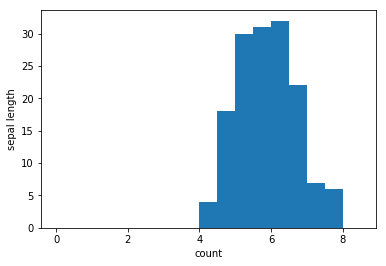

In [3]:
# read dataset
df = pd.read_csv('../datasets/iris/iris.csv')

def histo():
    # create histogram
    bin_edges = np.arange(0, df['sepal_length'].max() + 1, 0.5)
    fig = plt.hist(df['sepal_length'], bins=bin_edges)

    # add plot labels
    plt.xlabel('count')
    plt.ylabel('sepal length')
    
    
histo()
plt.show()

In [4]:
x = df['sepal_length'].values
x.dtype

dtype('float64')

### Sample Mean:

$$\bar{x} = \frac{1}{n}\sum_{i=1}^n = x_i$$

In [5]:
sum(i for i in x) / len(x)

5.8433333333333346

In [6]:
x_mean = np.mean(x)
x_mean

5.8433333333333337

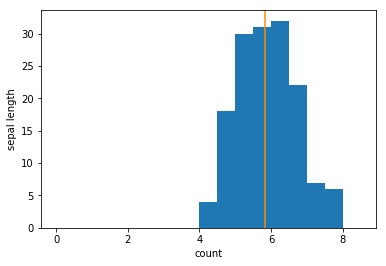

In [7]:
histo()
plt.axvline(x_mean, color='darkorange')
plt.show()

### Sample Variance:

$$Var_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

- Bessel's correction to correct the bias of the population variance estimate
- Note the $unit$ of the variable is now $unit^2$

In [8]:
sum([(i - x_mean)**2 for i in x]) / (len(x) - 1)

0.68569351230425035

In [9]:
var = np.var(x, ddof=1)
var

0.68569351230425069

In [10]:
df['sepal_length'].var() # note that Bessel's correction is the default

0.68569351230425069

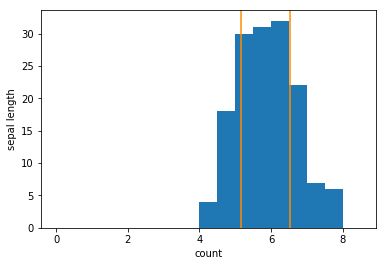

In [11]:
histo()
plt.axvline(x_mean + var, color='darkorange')
plt.axvline(x_mean - var, color='darkorange')
plt.show()

### Sample Standard Deviation:

$$Std_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$

In [12]:
(sum([(i - x_mean)**2 for i in x]) / (len(x) - 1))**0.5

0.82806612797786283

In [13]:
np.sqrt(np.var(x, ddof=1))

0.82806612797786305

In [14]:
std = np.std(x, ddof=1)
std

0.82806612797786305

In [15]:
df['sepal_length'].std() # note that Bessel's correction is the default

0.82806612797786305

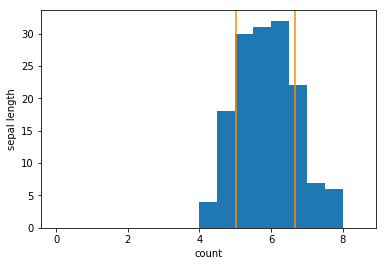

In [16]:
histo()
plt.axvline(x_mean + std, color='darkorange')
plt.axvline(x_mean - std, color='darkorange')
plt.show()

### Min/Max:

In [17]:
np.min(x)

4.2999999999999998

In [18]:
np.max(x)

7.9000000000000004

### Mode:

In [19]:
lst = list(x)
mode = max(set(lst), key=lst.count)
mode

5.0

In [20]:
lst.count(mode)

10

In [21]:
stats.mode(x)

ModeResult(mode=array([ 5.]), count=array([10]))

### 25th and 75th Percentile:

In [22]:
y = np.sort(x)
percentile_25th = y[round(0.25 * y.shape[0]) + 1]
percentile_25th

5.0999999999999996

In [23]:
percentile_75th = y[round(0.75 * y.shape[0]) - 1]
percentile_75th

6.4000000000000004

In [24]:
np.percentile(x, q=[25, 75], interpolation='lower')

array([ 5.1,  6.4])

In [25]:
df['sepal_length'].quantile(0.25, interpolation='lower')

5.1

In [26]:
df['sepal_length'].quantile(0.75, interpolation='lower')

6.4

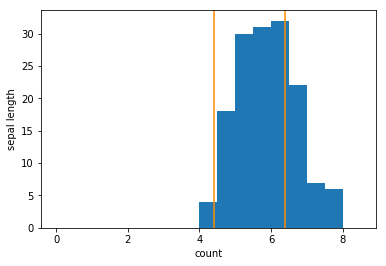

In [27]:
histo()
plt.axvline(percentile_75th, color='darkorange')
plt.axvline(percentile_25th - var, color='darkorange')
plt.show()

### Median (50th Percentile):

In [28]:
x = np.sort(x)

tmp = round(0.5 * x.shape[0])

if x.shape[0] % 2:
    median = x[tmp - 1]
else:
    median = x[tmp - 1] + (x[tmp] - x[tmp - 1]) / 2.
    
median

5.7999999999999998

In [29]:
np.median(x)

5.7999999999999998

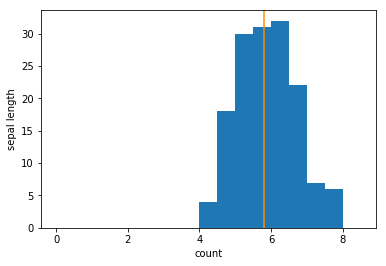

In [30]:
histo()
plt.axvline(median, color='darkorange')
plt.show()